# Observing RNN PSTH
This notebook does similar thing as VirtualRat.ipynb by loading weights and testing performance.
The purporse of this notebook is to pick sample PSTH from RNNs

In [1]:
import numpy as npp
import minpy.numpy as np
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from model.VirtualRatModel import VirtualRatModel
from model.VirtualRatSolver import VirtualRatSolver
from model.VirtualRatBox import VirtualRatBox
from model.VirtualRat import VirtualRat
from model.VirtualRatFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W0827 01:31:25 14126 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter

VirtualRat1


/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


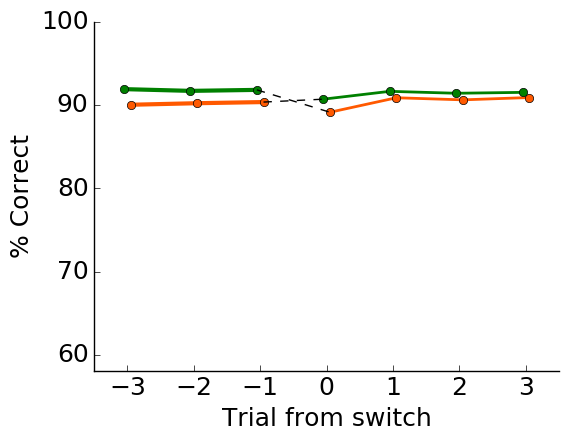

VirtualRat2


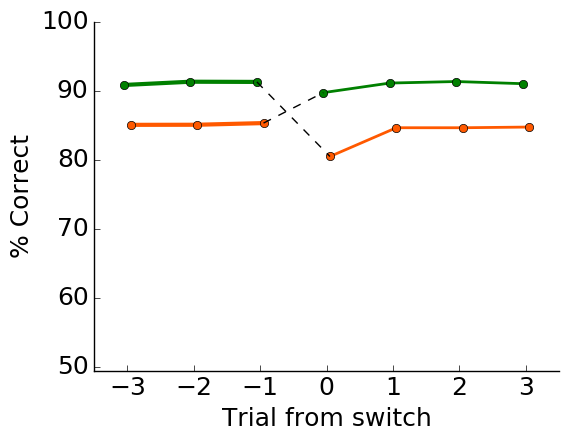

VirtualRat3


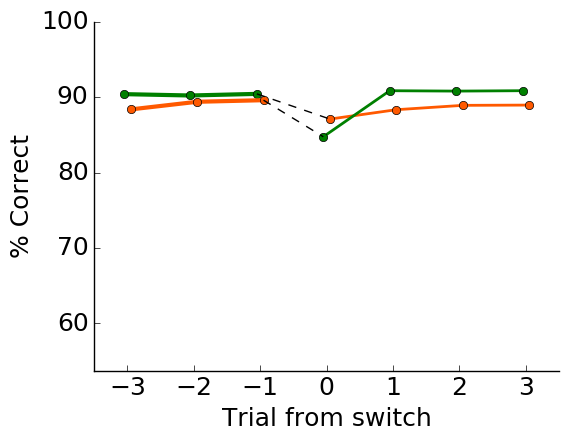

VirtualRat4


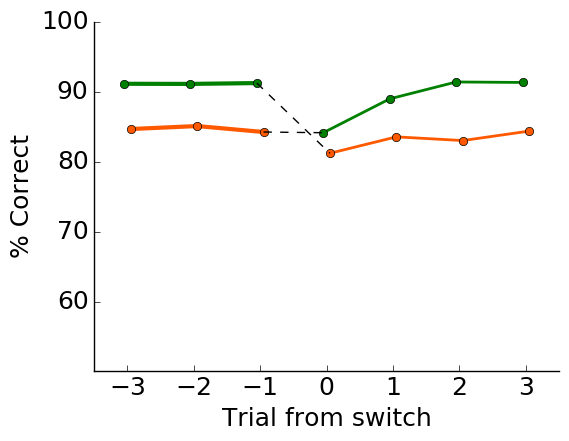

VirtualRat5


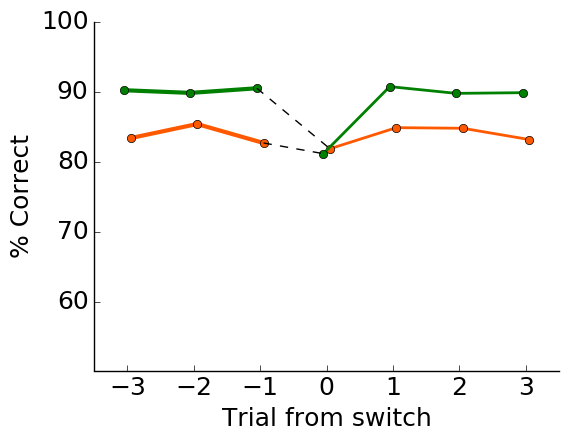

VirtualRat6


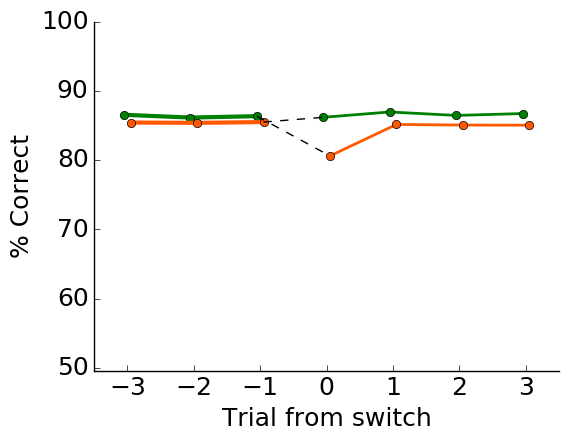

VirtualRat8


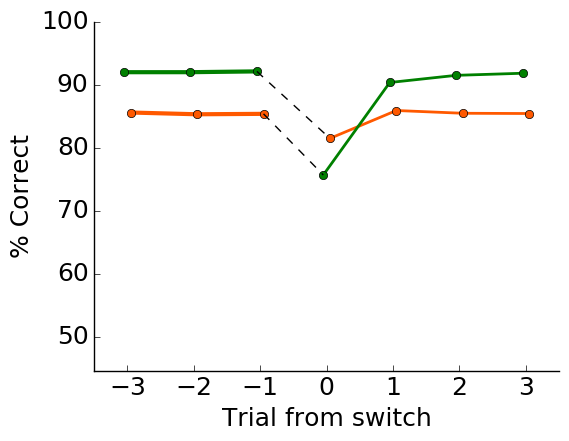

VirtualRat9


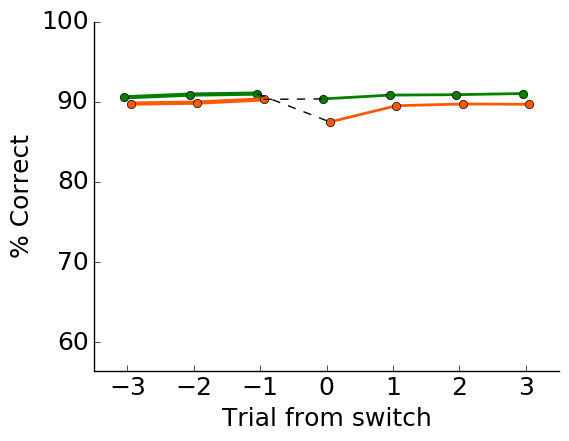

VirtualRat10


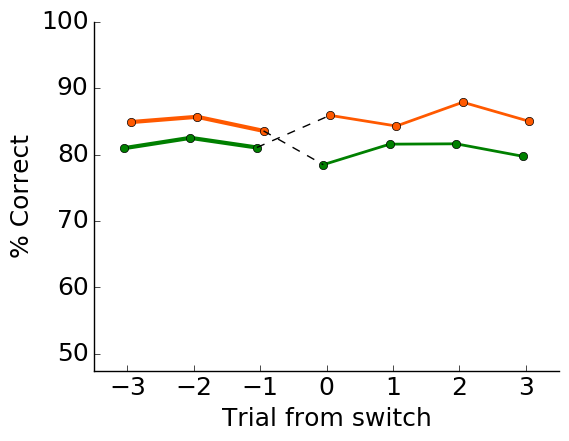

VirtualRat11


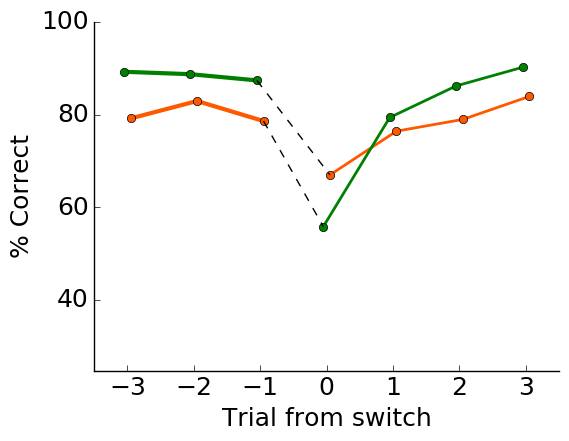

VirtualRat13


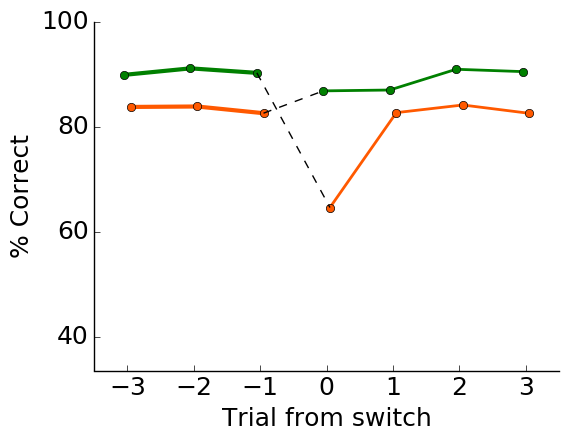

VirtualRat14


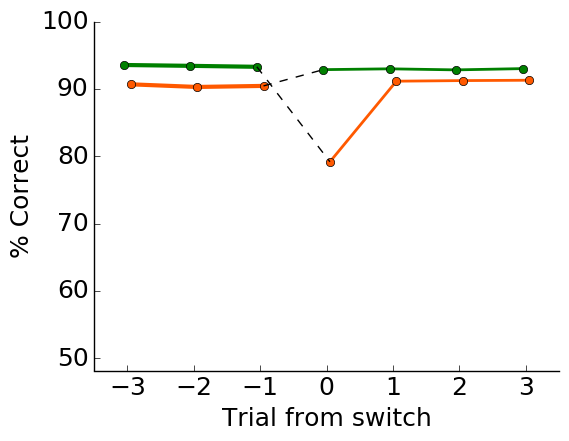

VirtualRat15


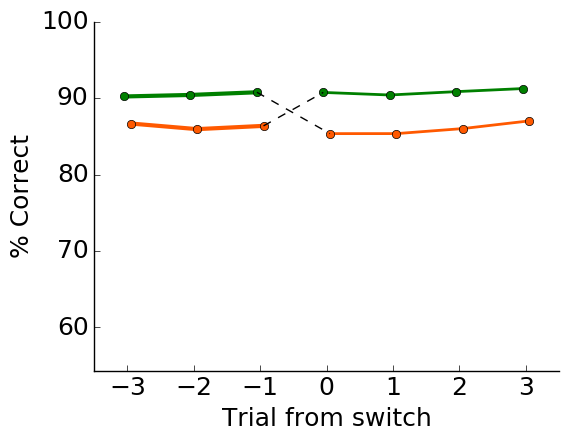

VirtualRat16


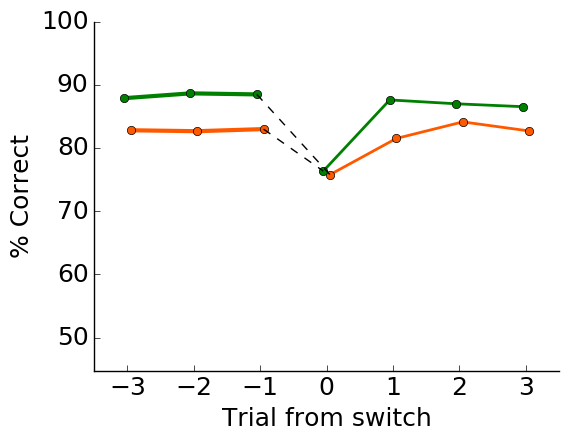

VirtualRat17


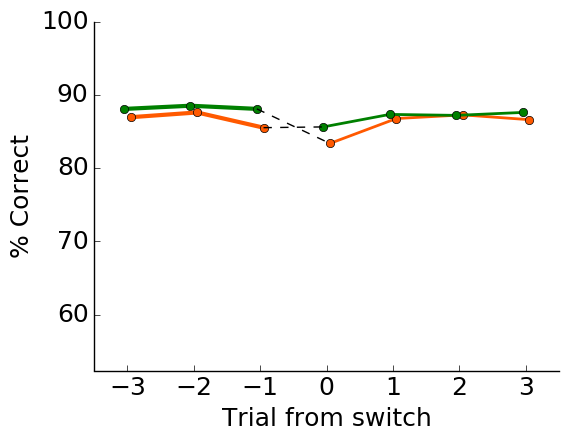

VirtualRat18


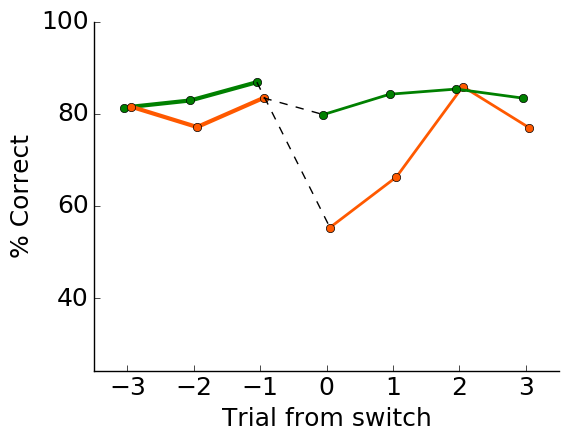

VirtualRat19


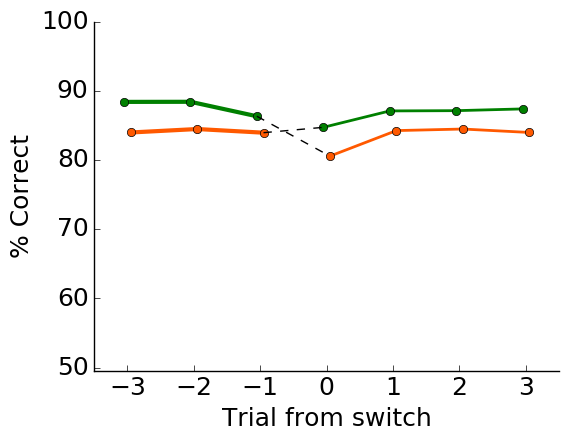

VirtualRat20


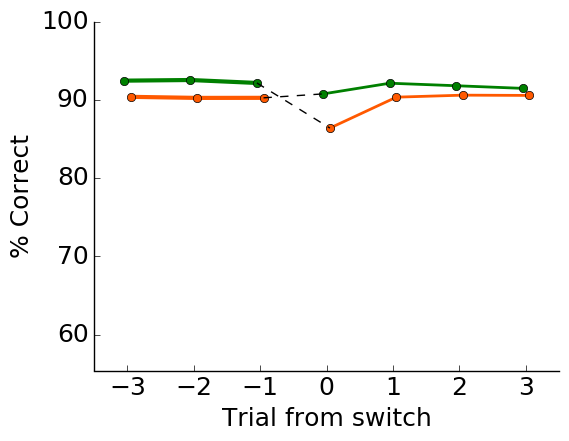

VirtualRat21


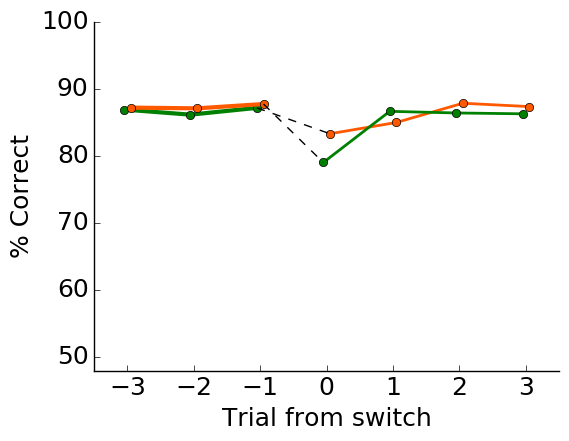

VirtualRat22


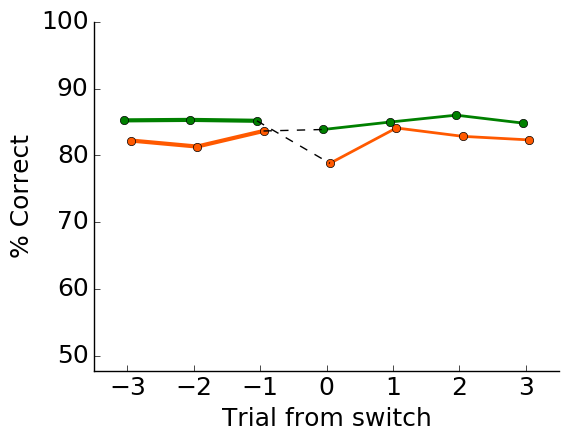

VirtualRat23


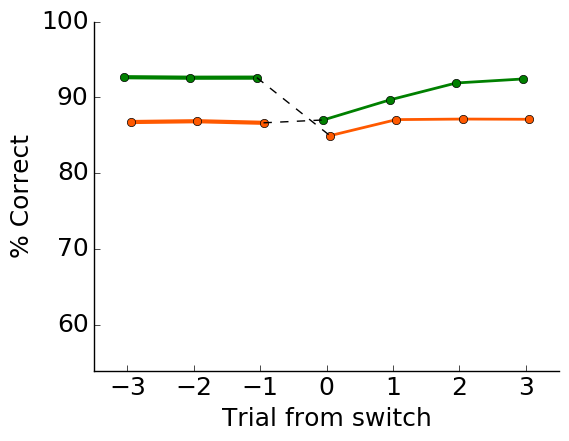

VirtualRat24


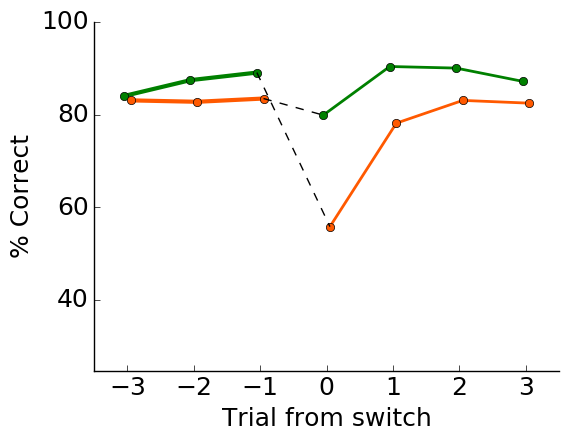

VirtualRat25


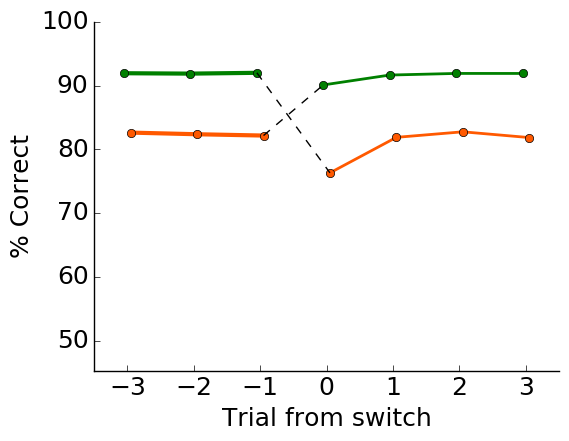

VirtualRat26


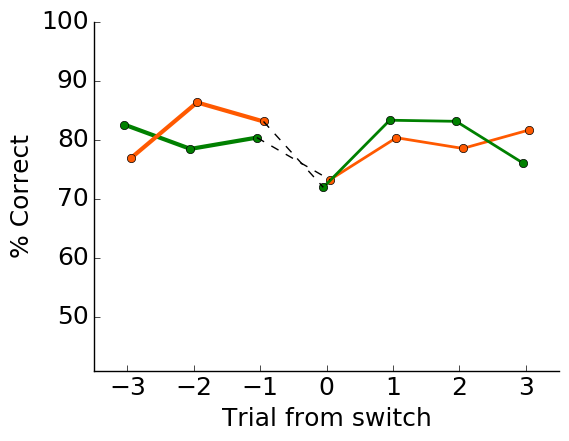

VirtualRat27


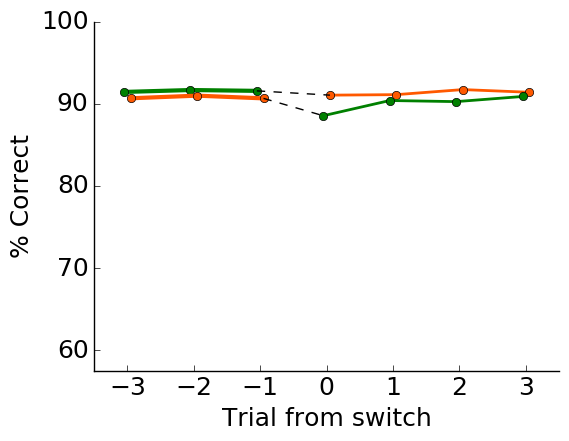

VirtualRat28


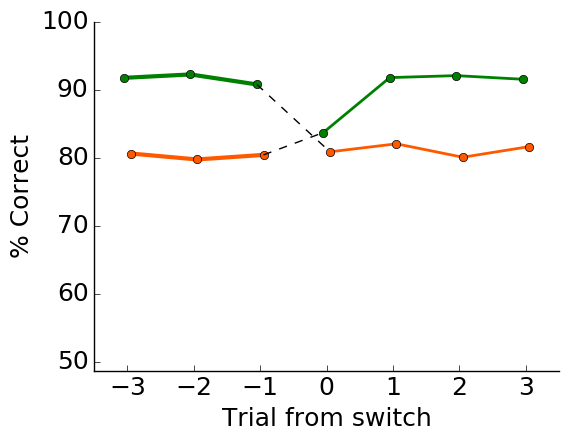

VirtualRat29


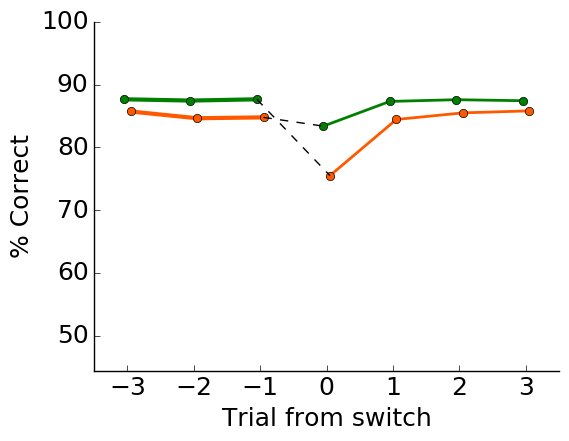

VirtualRat30


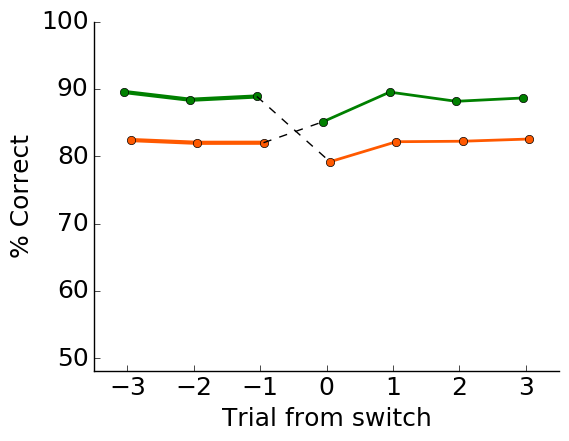

VirtualRat31


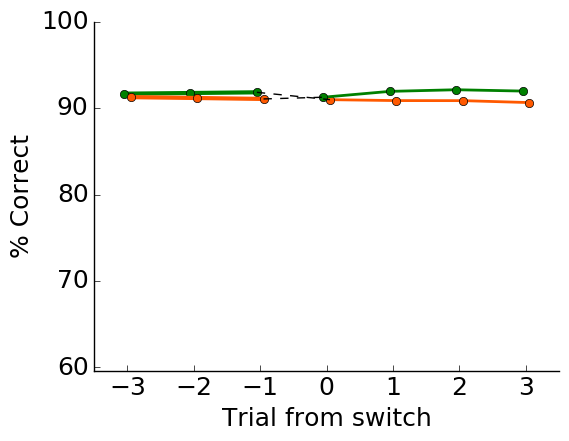

VirtualRat32


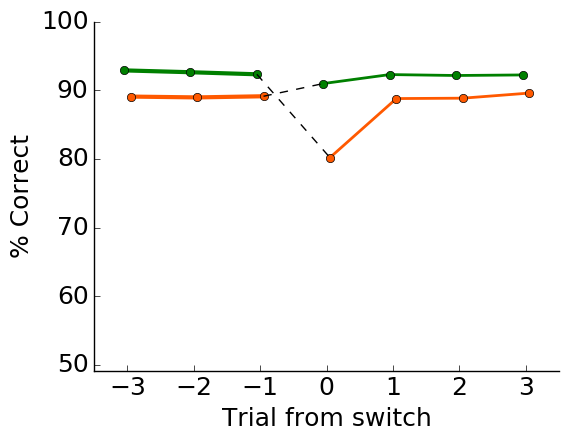

VirtualRat33


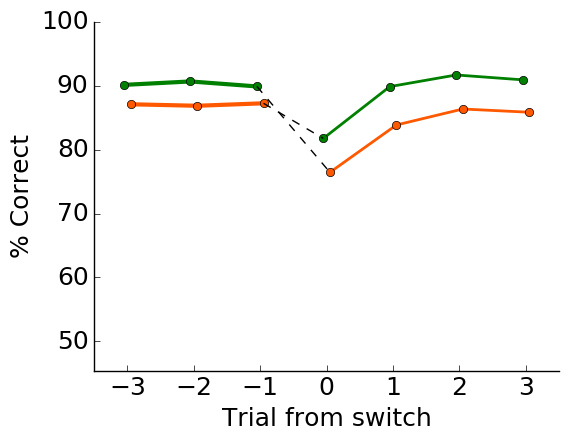

VirtualRat34


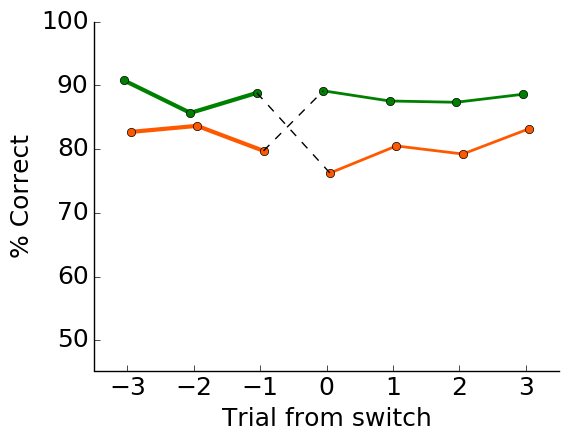

VirtualRat35


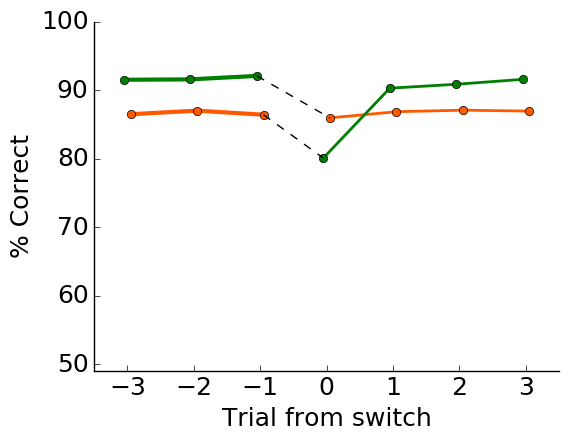

VirtualRat36


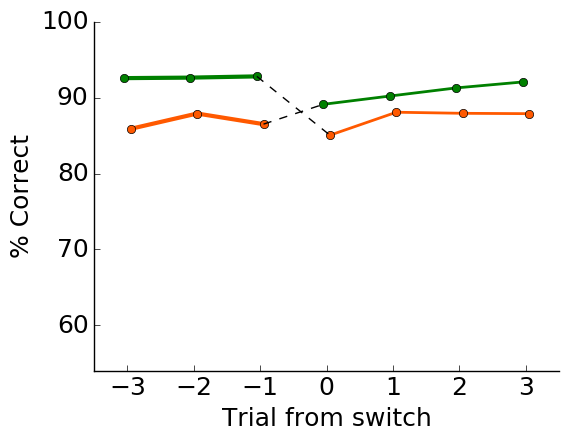

VirtualRat37


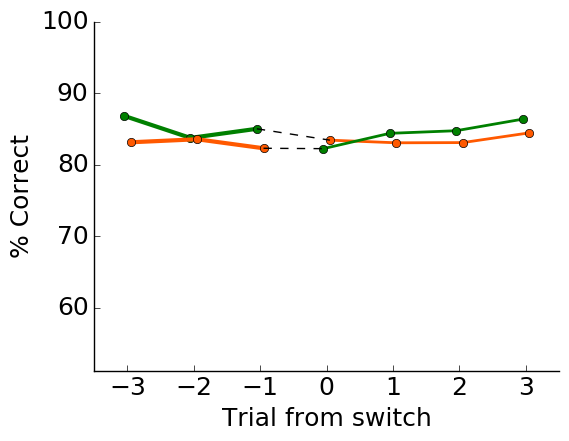

VirtualRat38


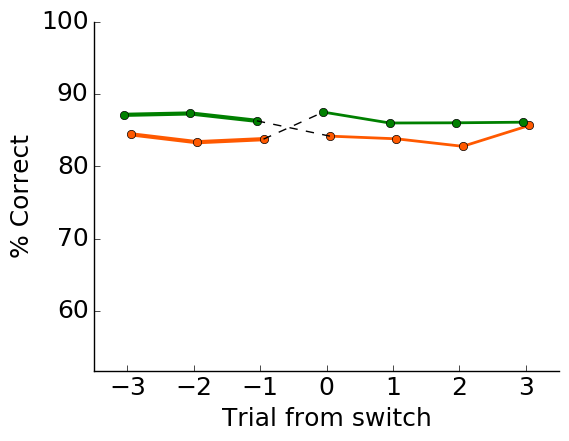

VirtualRat39


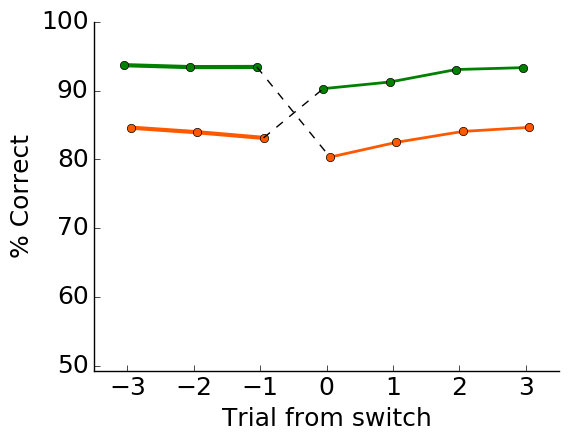

VirtualRat40


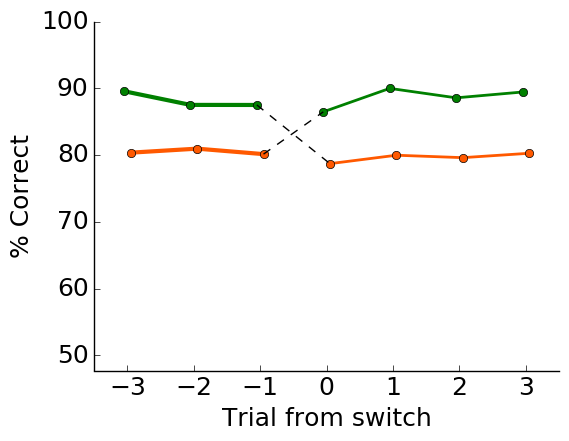

VirtualRat41


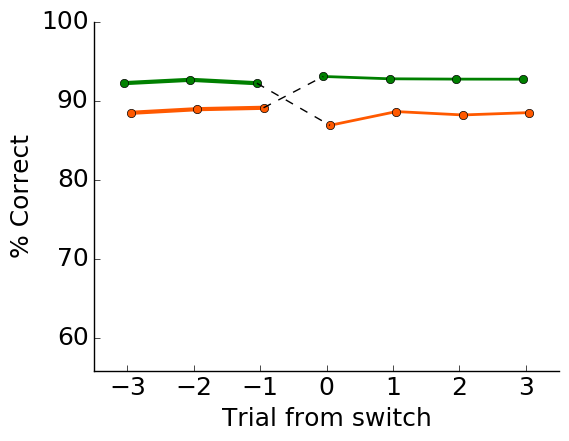

VirtualRat42


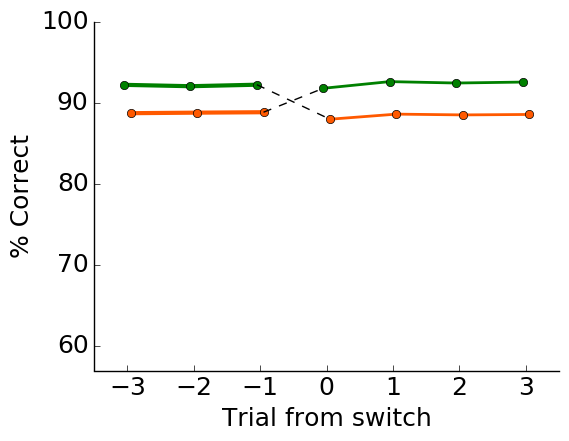

VirtualRat43


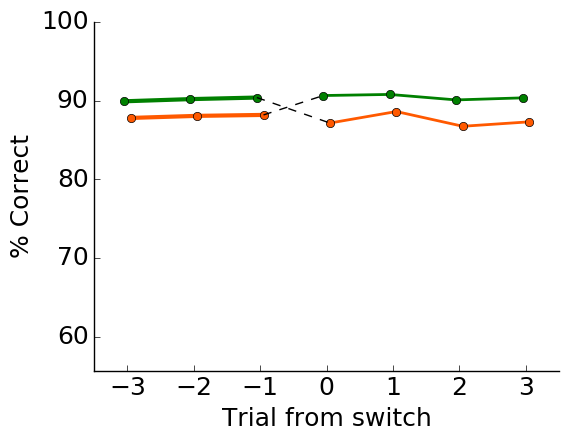

VirtualRat44


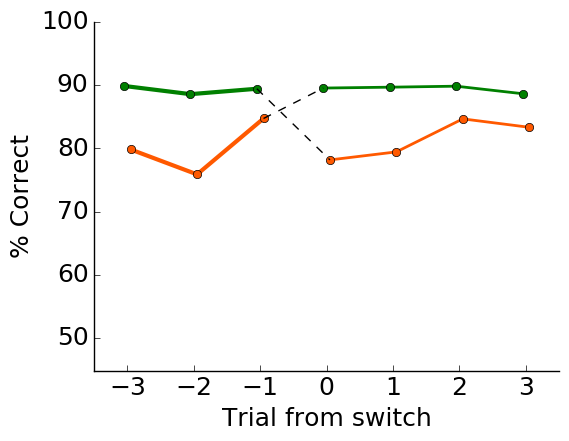

VirtualRat45


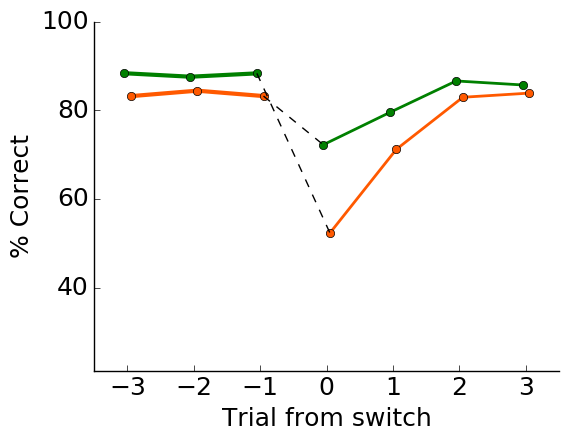

VirtualRat46


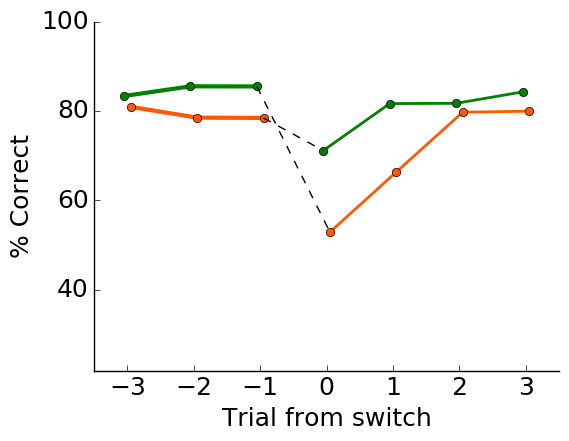

VirtualRat47


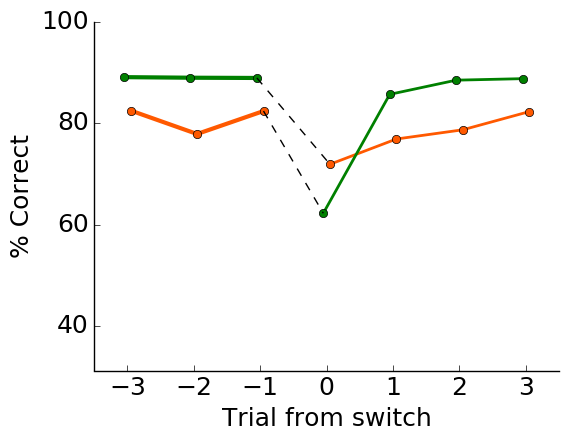

VirtualRat48


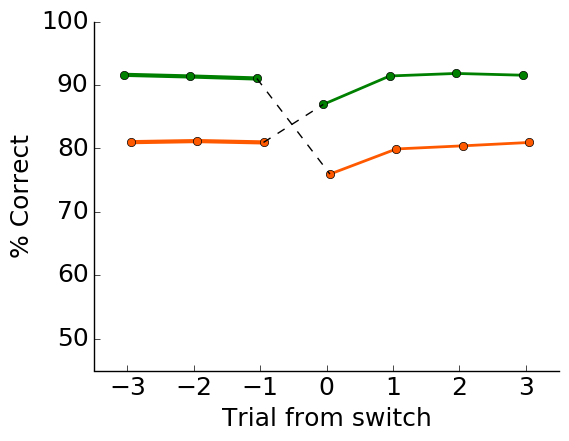

VirtualRat50


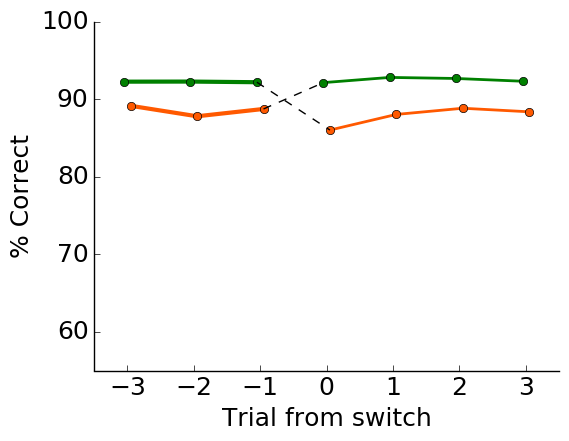

VirtualRat51


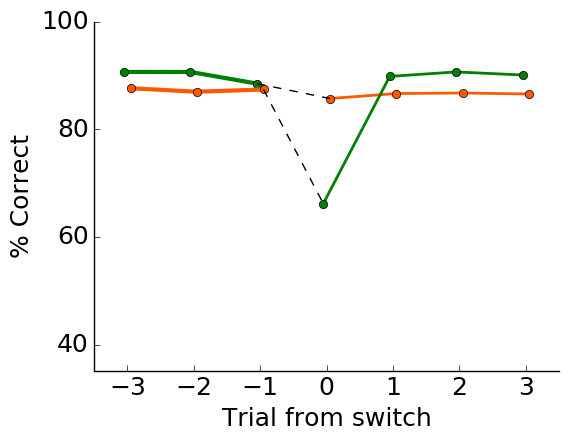

VirtualRat52


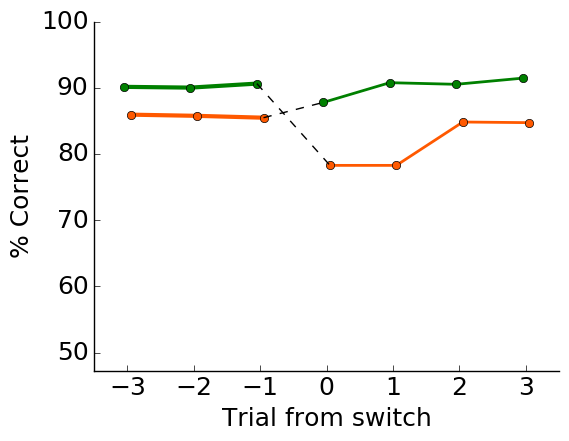

VirtualRat53


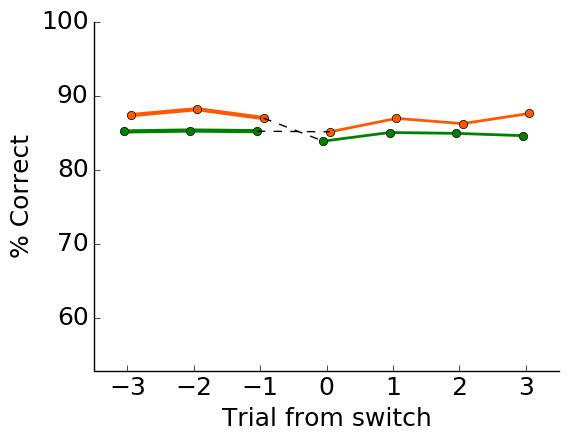

VirtualRat54


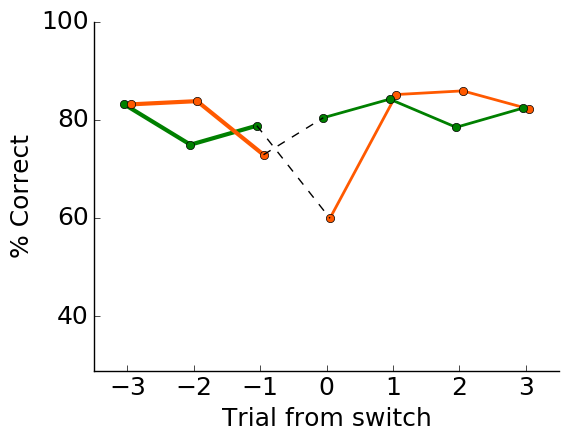

VirtualRat55


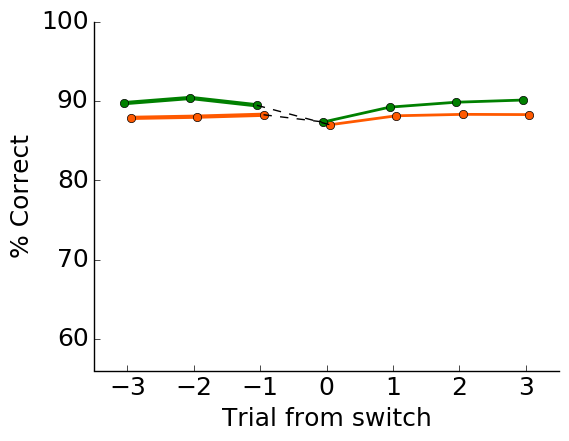

VirtualRat57


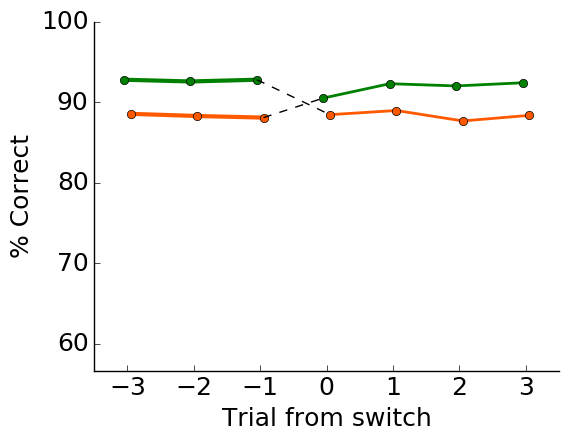

VirtualRat58


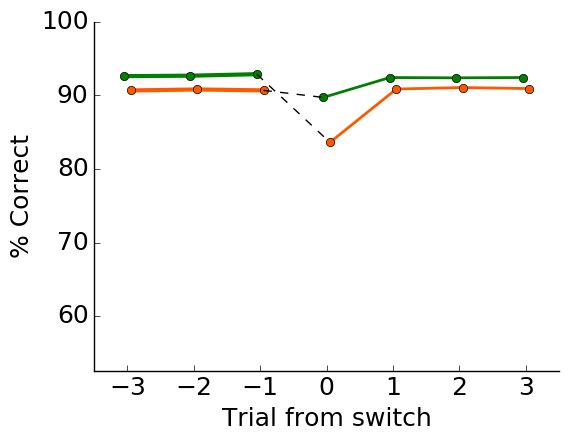

VirtualRat59


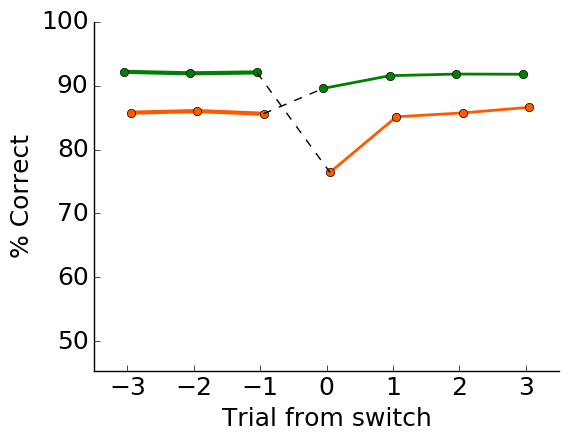

VirtualRat61


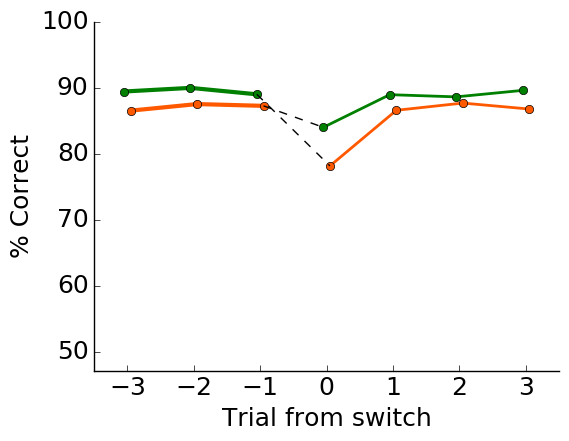

VirtualRat62


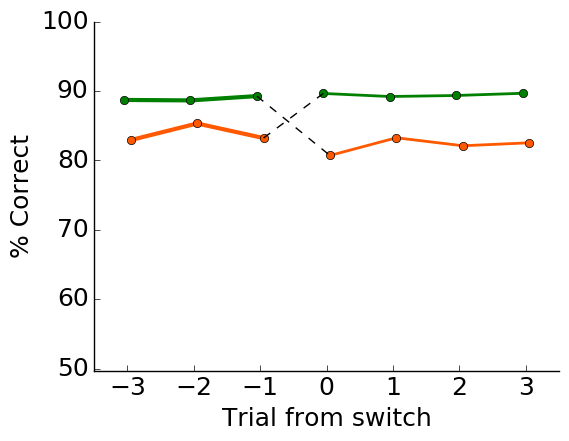

VirtualRat63


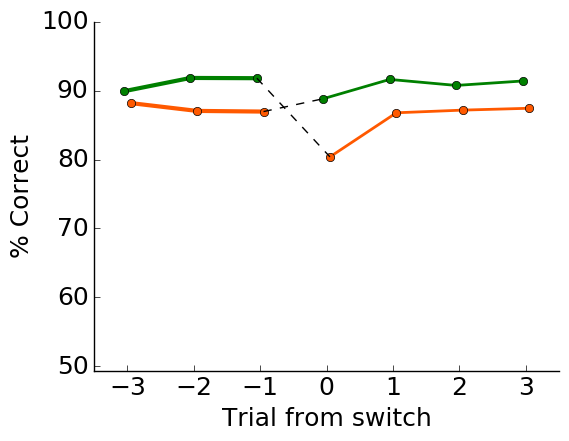

VirtualRat64


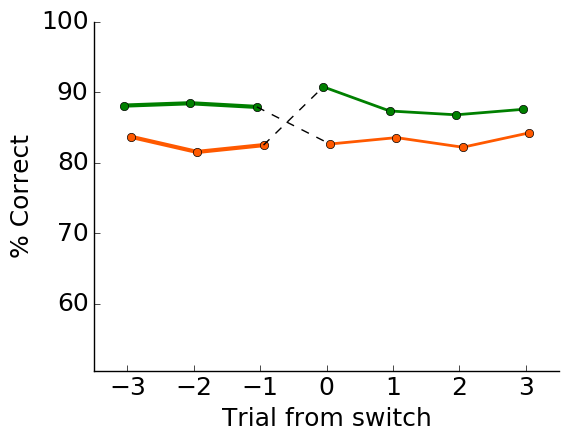

VirtualRat65


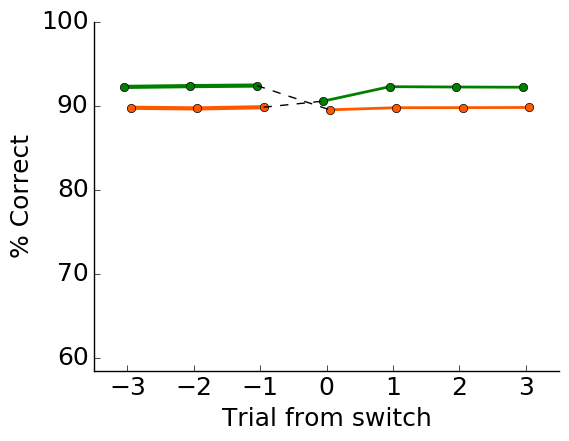

VirtualRat66


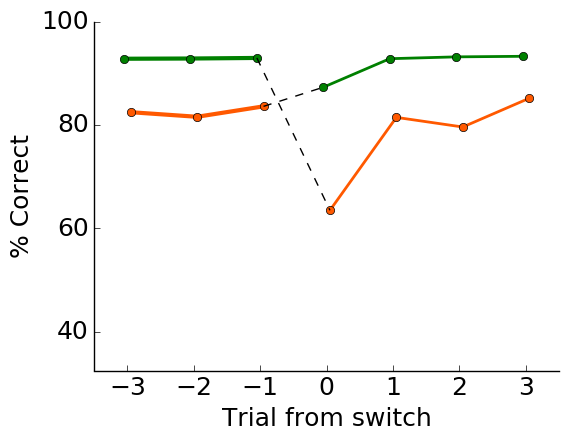

VirtualRat67


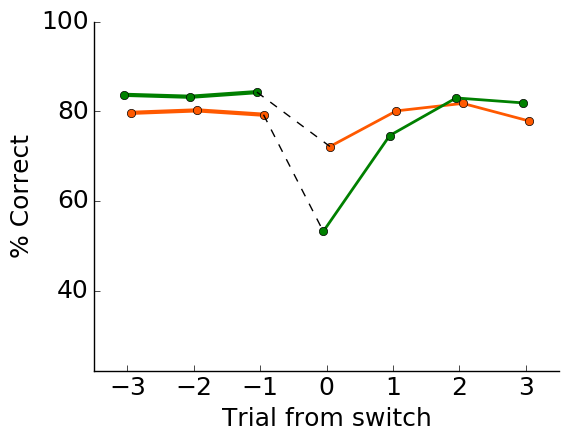

VirtualRat68


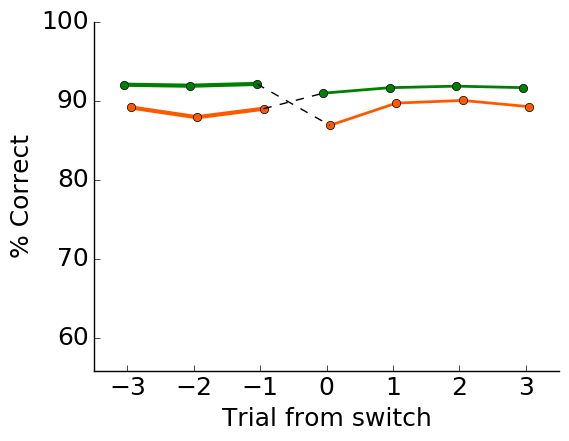

VirtualRat69


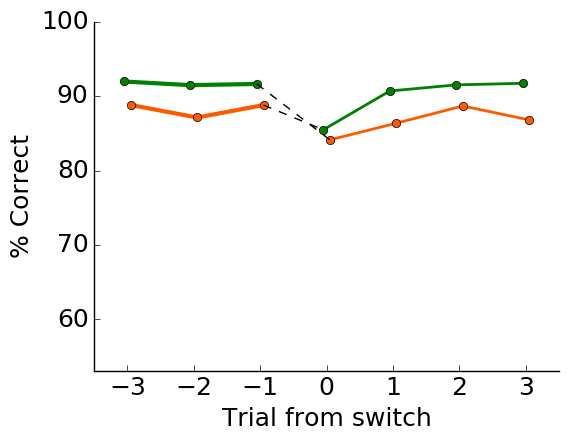

VirtualRat70


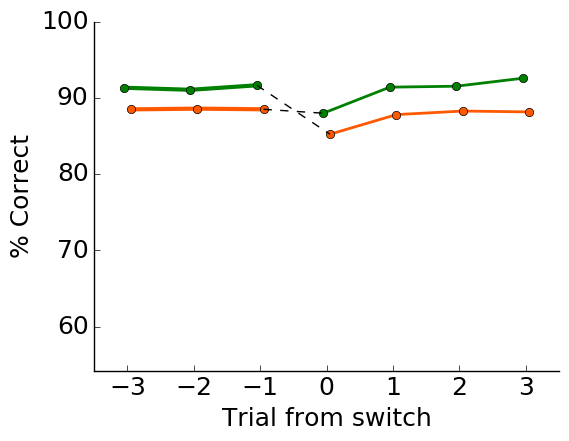

VirtualRat71


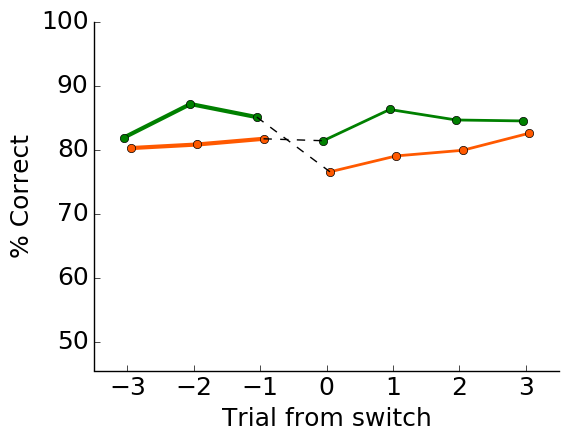

VirtualRat72


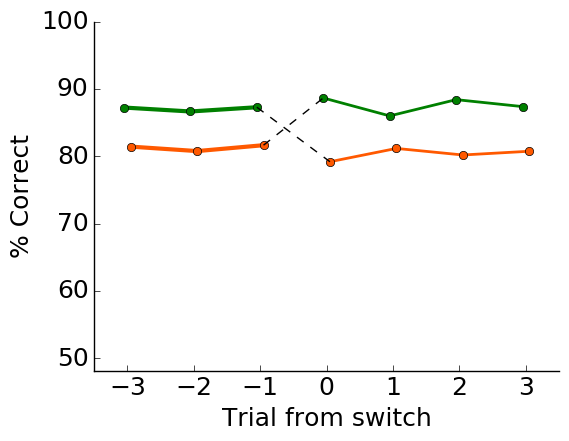

VirtualRat73


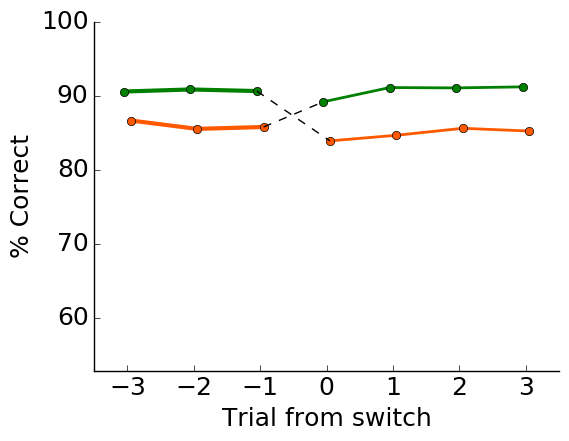

VirtualRat74


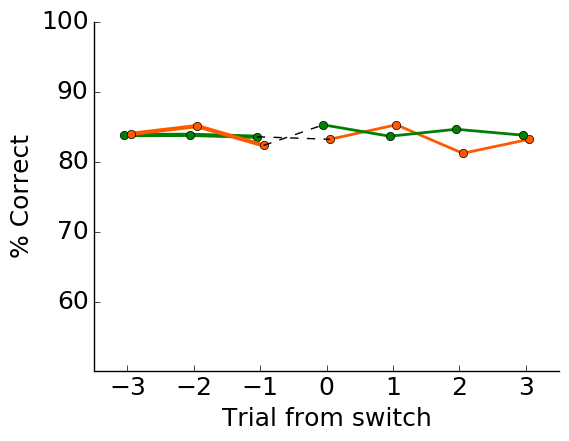

VirtualRat75


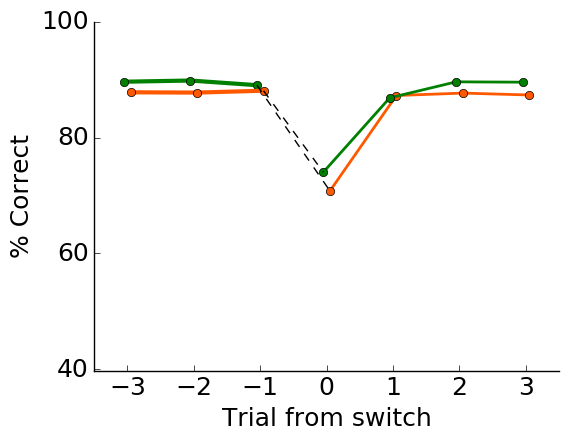

VirtualRat76


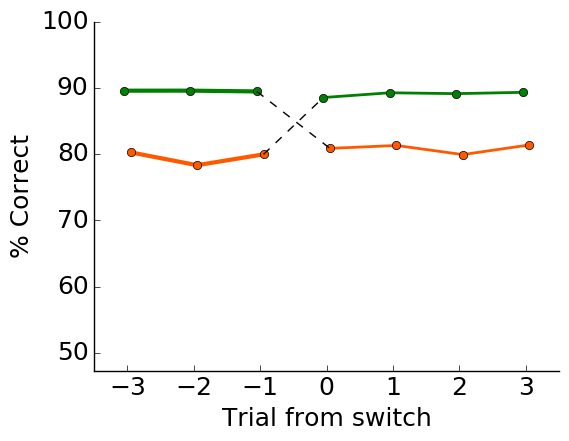

VirtualRat77


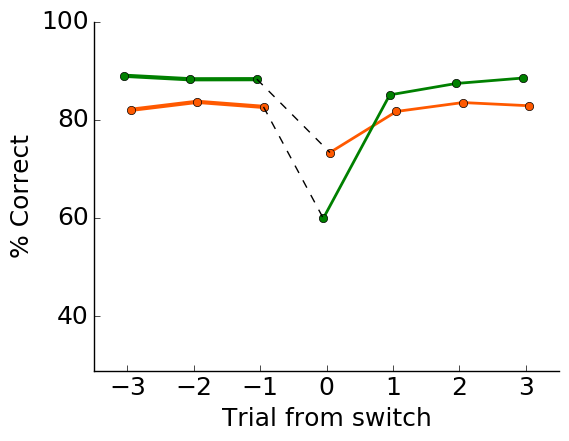

VirtualRat78


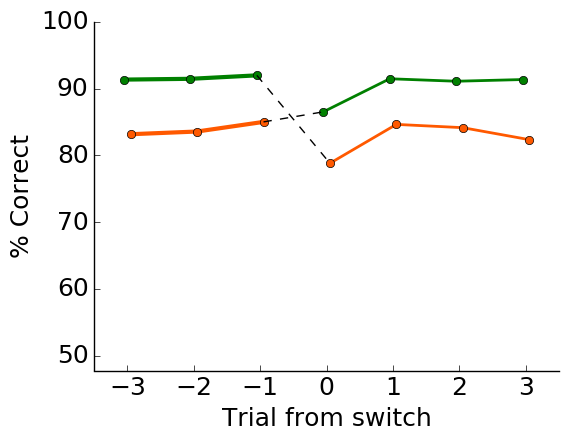

VirtualRat79


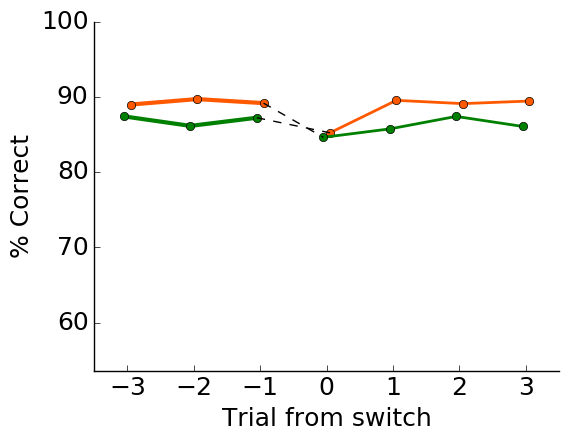

VirtualRat80


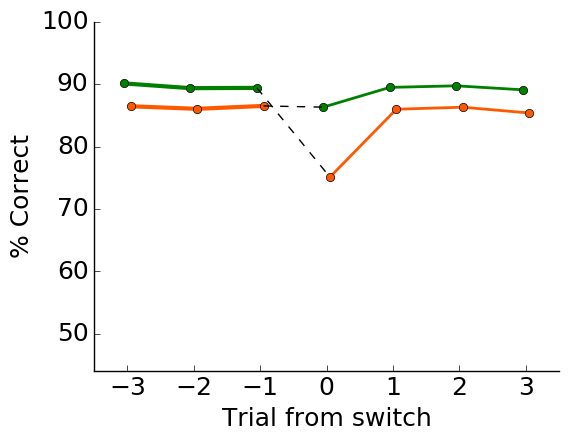

VirtualRat81


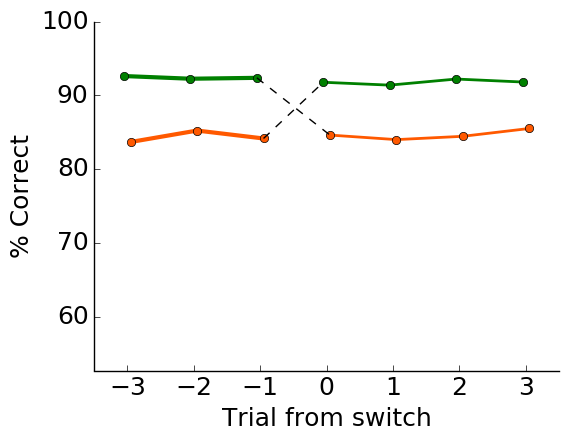

VirtualRat83


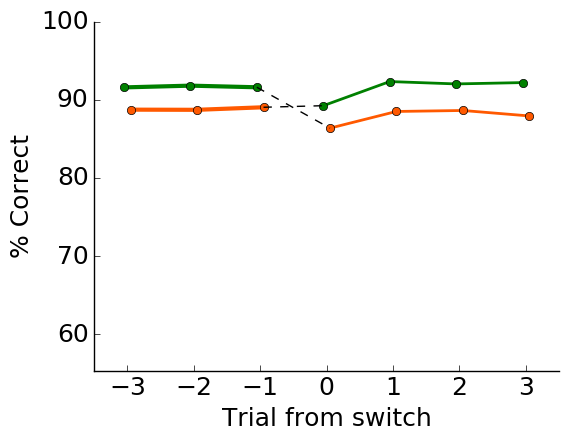

VirtualRat84


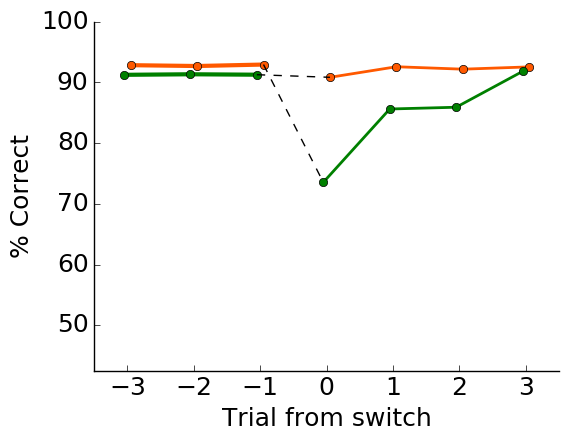

VirtualRat85


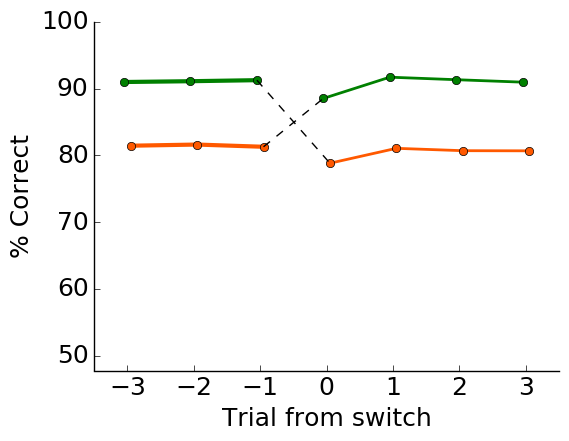

VirtualRat86


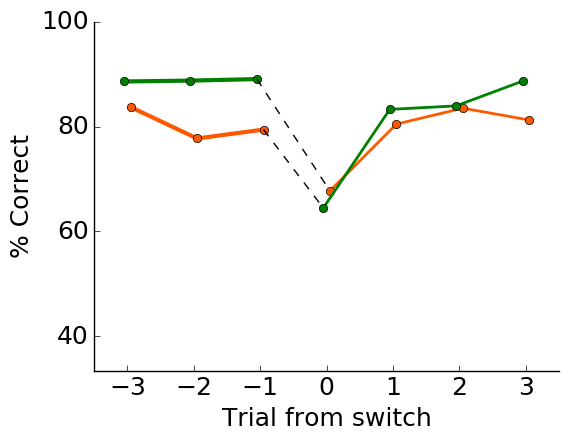

VirtualRat87


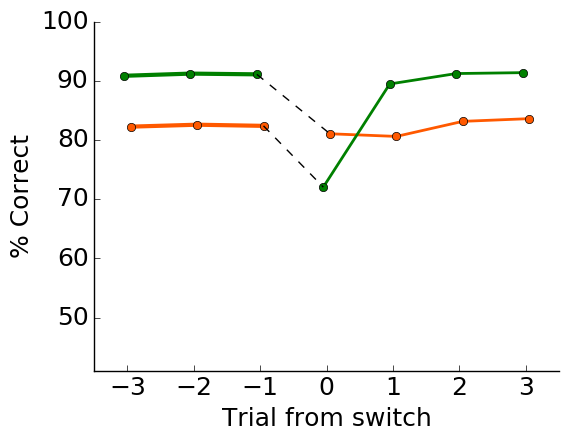

VirtualRat88


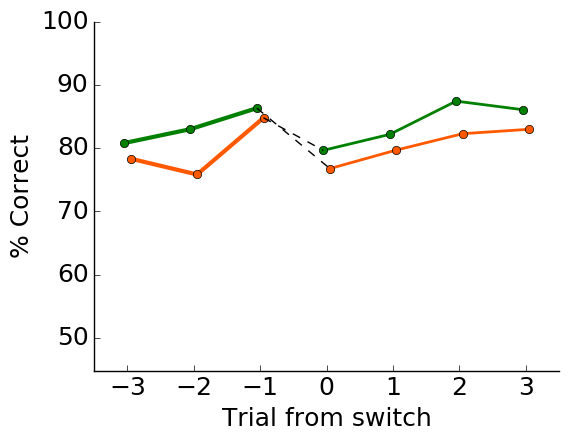

VirtualRat89


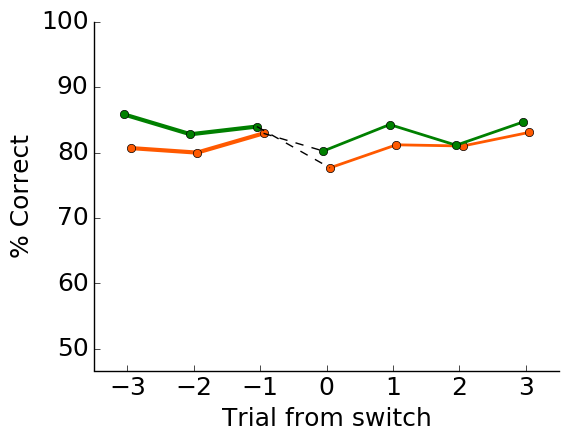

VirtualRat90


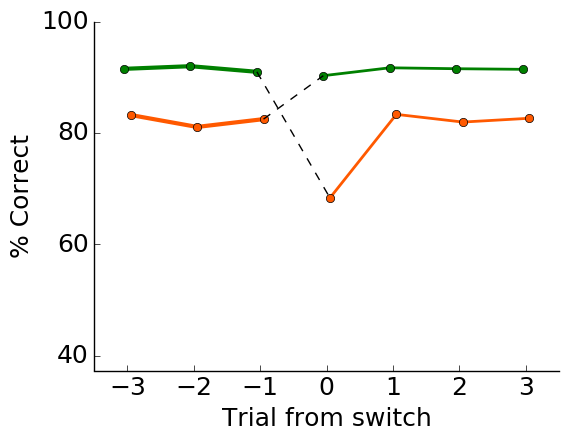

VirtualRat91


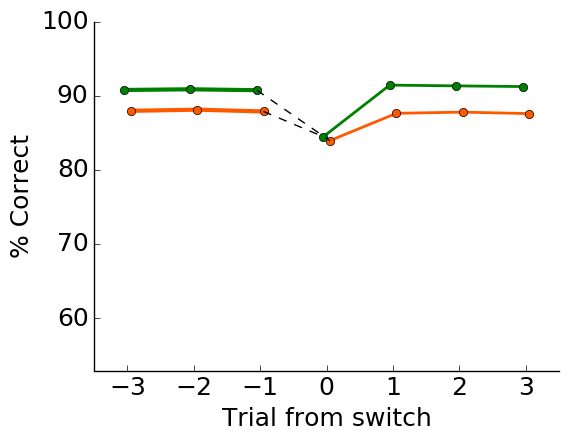

VirtualRat92


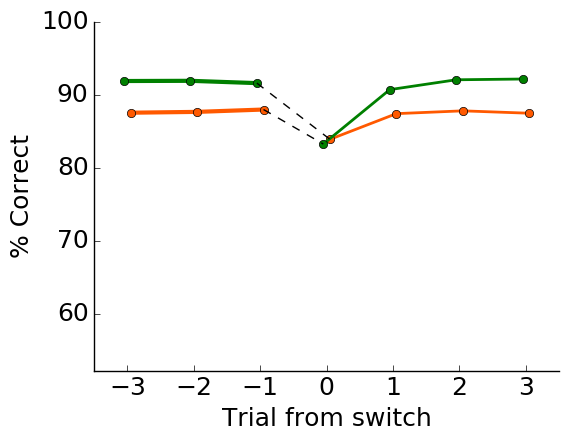

VirtualRat93


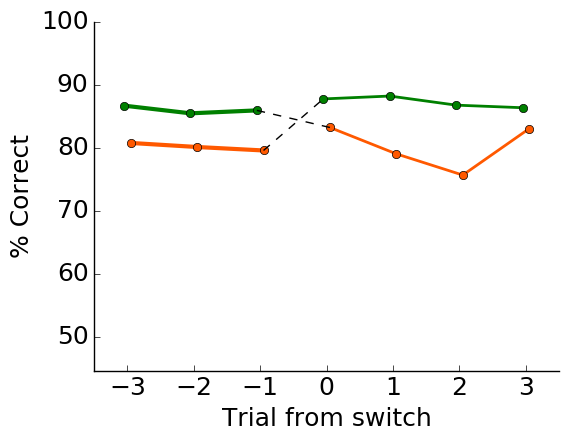

VirtualRat94


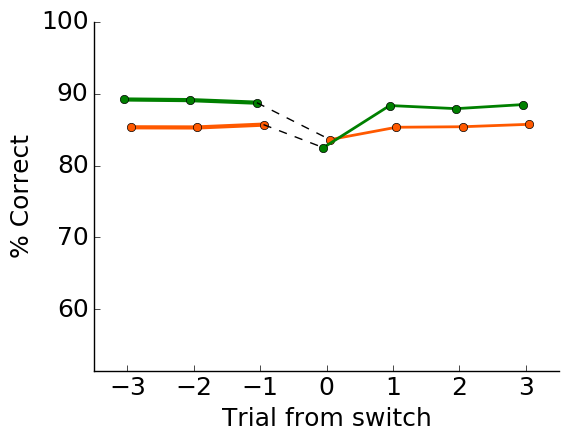

VirtualRat95


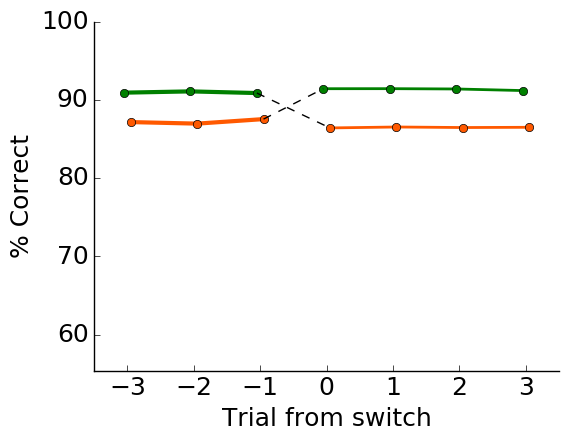

VirtualRat96


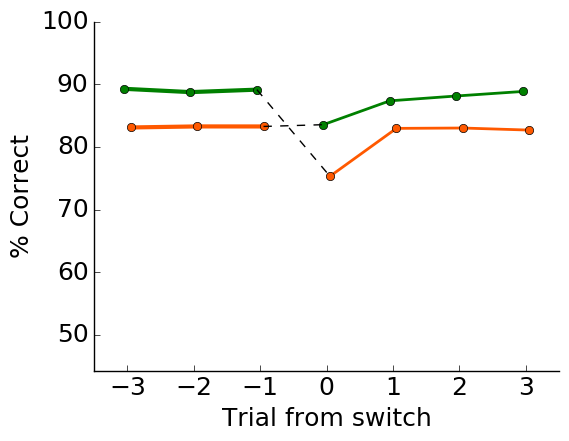

VirtualRat98


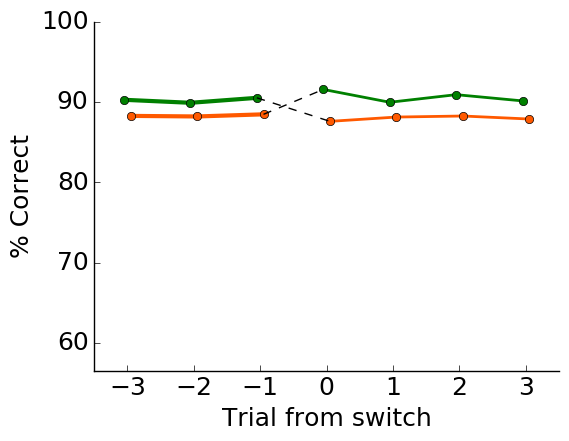

VirtualRat99


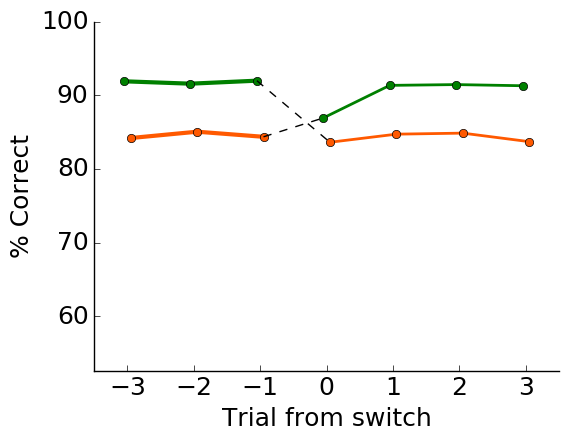

In [2]:
which_to_choose = load_weights("pkls/time_steps_for_3d-0.85.pkl")
rats = []
trial_window = 3

for i in range(len(which_to_choose)):
    ratname = "VirtualRat"+str(which_to_choose[i][0])
    try:
        loaded_params = load_weights("/scratch/xl1066/VirtualRat/publication/TrainingTime/trainedTrainingTime-"+\
                                     str(which_to_choose[i][0])+"-"+str(which_to_choose[i][1]*100)+".pkl")
        print ratname
    except IOError:
        continue
    np.random.seed(which_to_choose[i][0])
    npp.random.seed(which_to_choose[i][0])
    box = VirtualRatBox(mode="alternative",length=1000,block_size=30)
    test_X, test_y = box.X, box.y
    model = VirtualRatModel()
    rat = VirtualRat(model,ratname = ratname, trial_window = trial_window)
    rats.append(rat)
    solver = VirtualRatSolver(model, box) # Dummmy solver in order to load weights.
    np.random.seed(which_to_choose[i][0])
    npp.random.seed(which_to_choose[i][0])
    solver.init()
    solver.load_params(loaded_params)
    probs = rat.predict(test_X, test_y)
    draw_3d(rat.p2a_prob*100, rat.a2p_prob*100, trial_window = trial_window, fixed_size= False)
    rat.compute_PETH_ROC()
    rat.add_prediction_history()

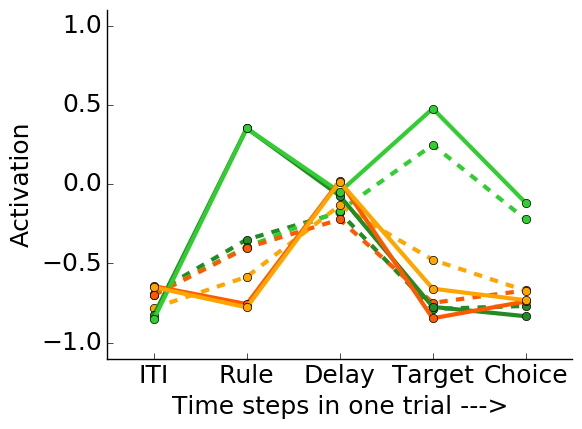

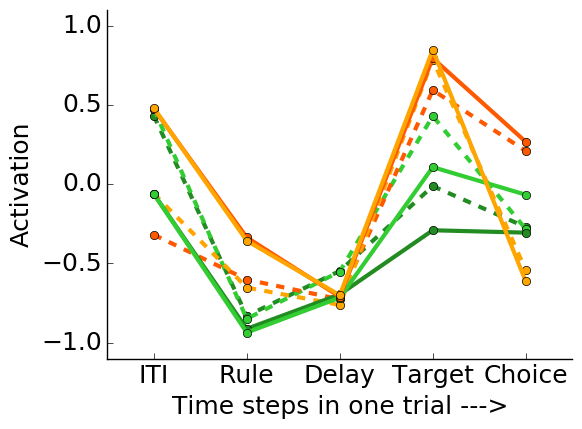

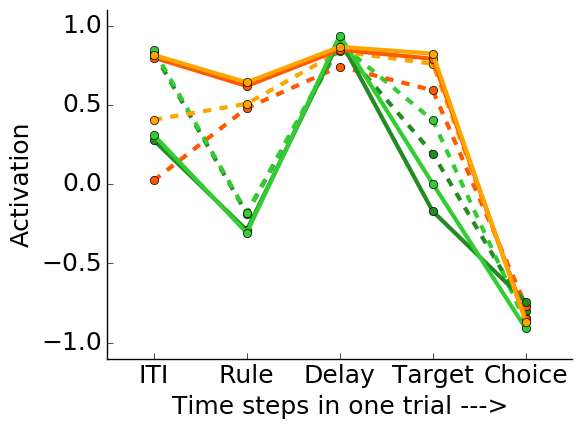

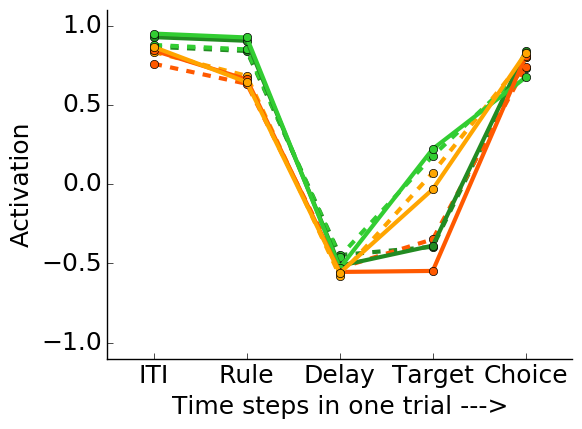

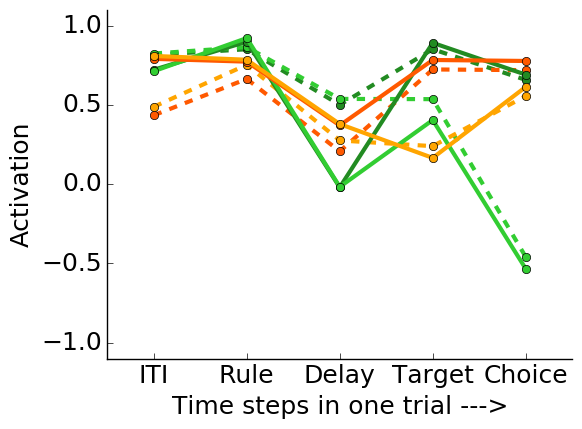

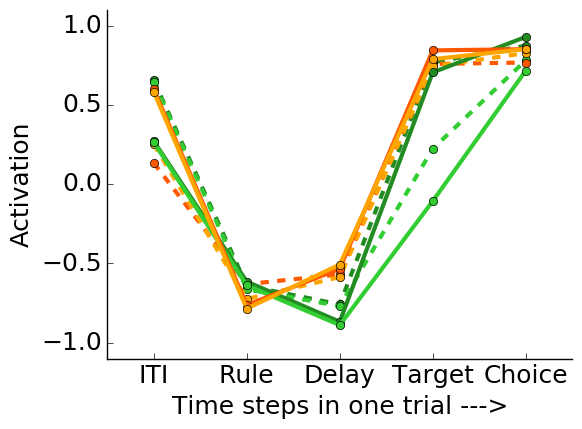

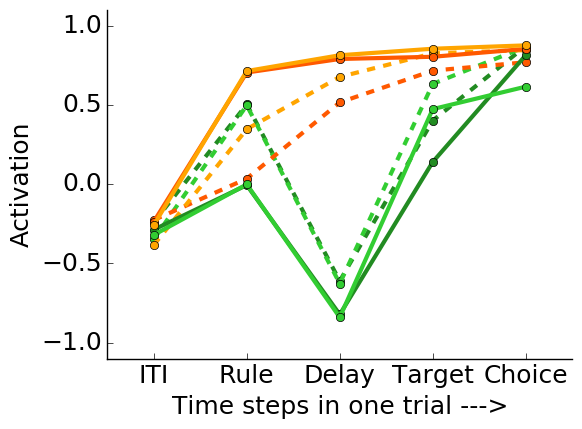

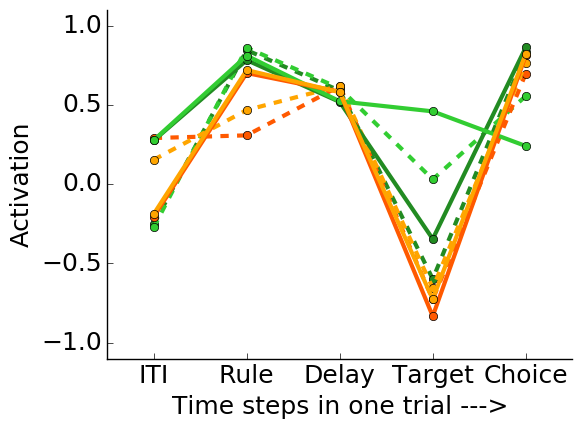

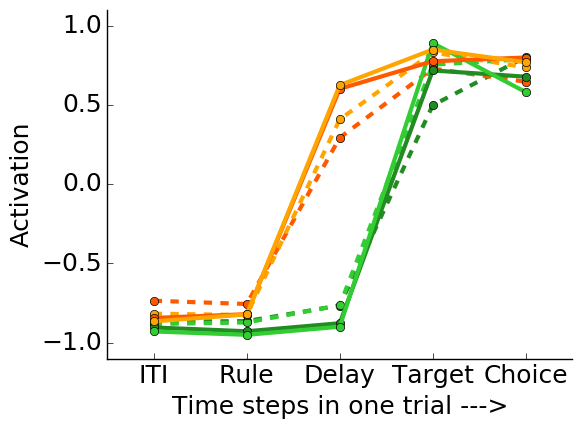

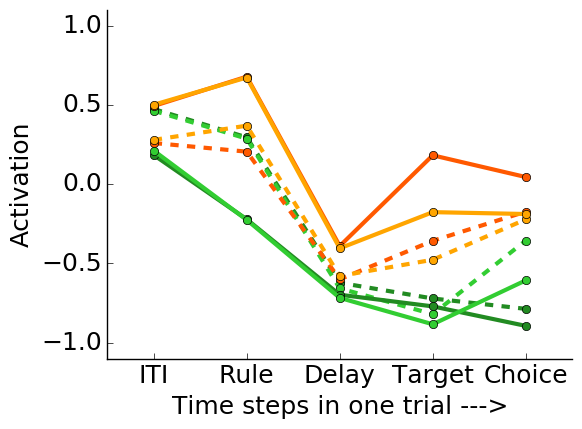

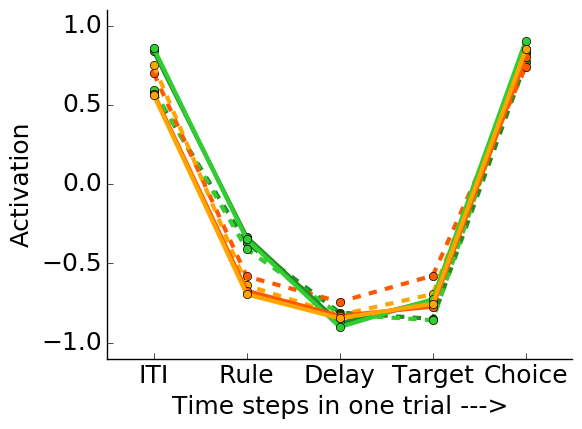

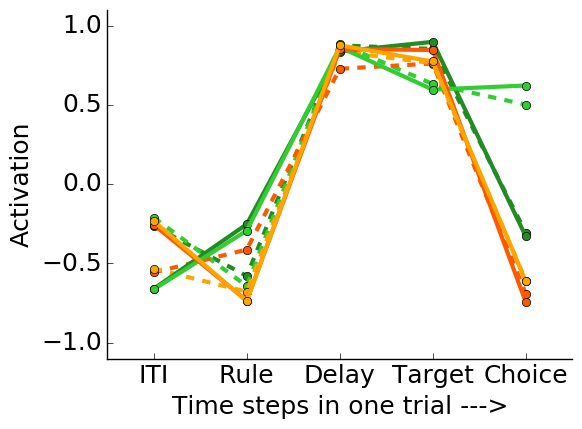

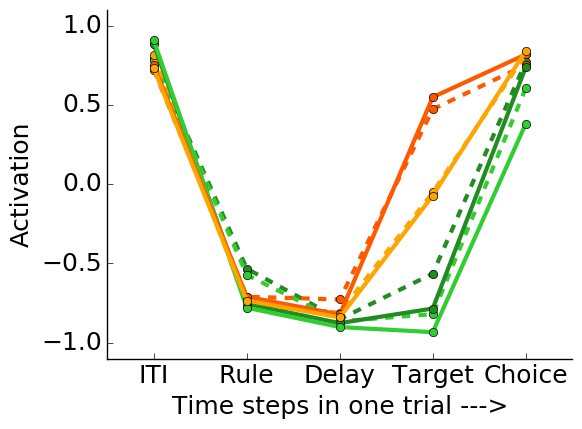

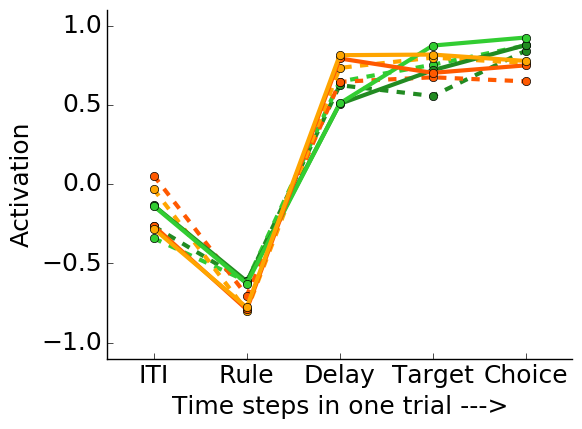

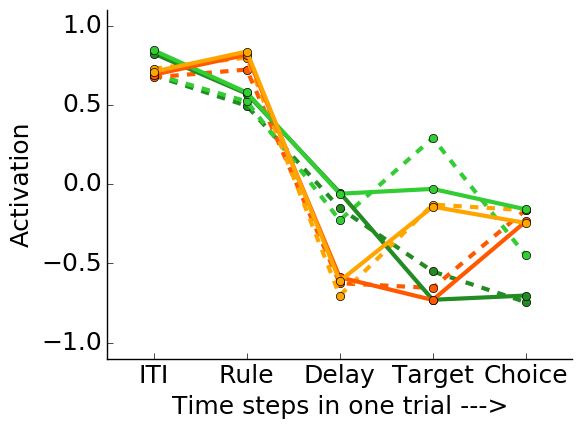

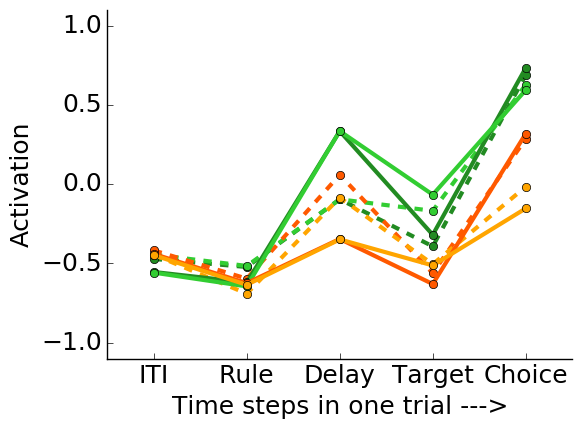

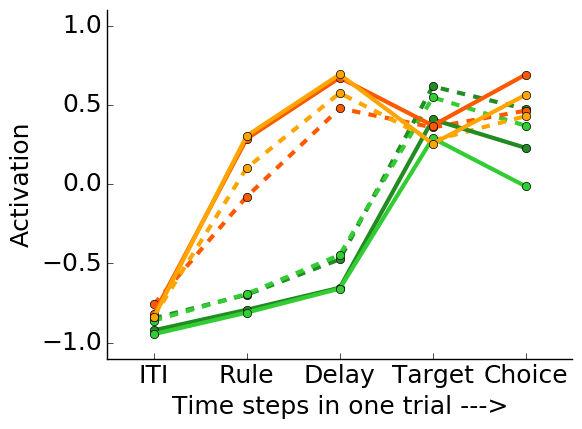

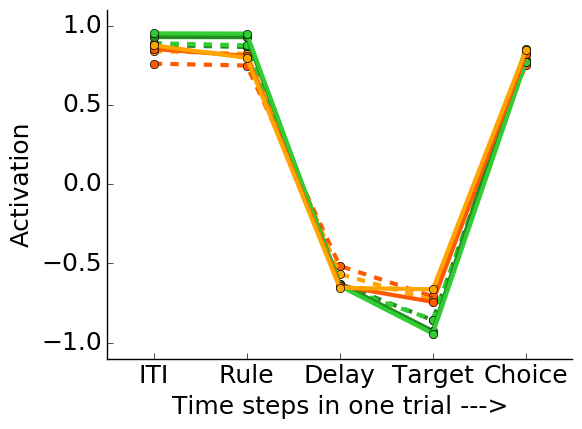

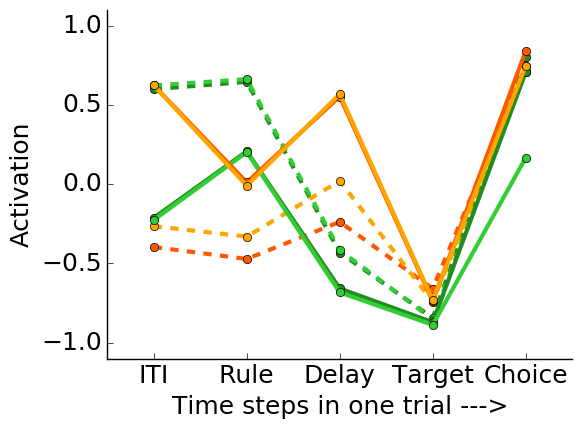

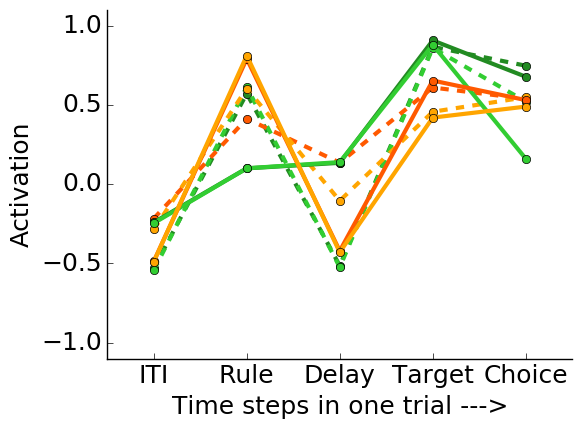

In [4]:
#PETH(rats[-3],switch=False, filename="PETH_block.pkl", legend = False)
PETH(rats[-3],switch=True, legend = False)